<img src="static\\swagger.png" style="height: 400px;">

Импортируем библиотеку `pandas` и загружаем датасет (разделителем указываем точку с запятой)

In [28]:
import pandas as pd
df = pd.read_csv("csv\\dataset25.csv", sep=";")

df["Valuation ($B) "] = pd.to_numeric(df["Valuation ($B) "].str.slice(0, -4).str.replace(",", "."))
df["Total Funding"] = pd.to_numeric(df["Total Funding"].str.slice(1, -2).str.replace(",", ""))

Посмотрим краткое содержание датасета. Видим, что датасет состоит из 100 строк и 10 столбцов

In [29]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              100 non-null    object 
 1   Valuation ($B)       100 non-null    float64
 2   Country              100 non-null    object 
 3   State                79 non-null     object 
 4   City                 99 non-null     object 
 5   Industries           99 non-null     object 
 6   Founded Year         100 non-null    int64  
 7   Name of Founders     100 non-null    object 
 8   Total Funding        100 non-null    float64
 9   Number of Employees  100 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ KB


Company  Valuation ($B)         Country           State           City  \
0   Bytedance            140.0          China         Beijing        Beijing   
1      SpaceX            100.3  United States      California      Hawthorne   
2      Stripe             95.0  United States      California  San Francisco   
3      Klarna             45.6         Sweden             NaN      Stockholm   
4  Epic Games             42.0  United States  North Carolina           Cary   

                                          Industries  Founded Year  \
0                     Content, Data Mining, Internet          2012   
1  Aerospace, Manufacturing, Space Travel, Transp...          2002   
2            Finance, FinTech, Mobile Payments, SaaS          2010   
3            E-Commerce, FinTech, Payments, Shopping          2005   
4  Developer Platform, Gaming, Software, Video Games          1991   

                                    Name of Founders  Total Funding  \
0                                       Yiming Zhang         7440.0   
1                                          Elon Musk          383.0   
2                    John Collison, Patrick Collison          300.0   
3  Niklas Adalberth, Sebastian Siemiatkowski, Vic...         3471.7   
4                             Mark Rein, Tim Sweeney          544.9   

  Number of Employees  
0              10.000  
1        5,000-10,000  
2         1,000-5,000  
3        5,000-10,000  
4         1,000-5,000

Выведем названия столбцов для удобства

In [30]:
df.columns

Index(['Company', 'Valuation ($B) ', 'Country', 'State', 'City', 'Industries',
       'Founded Year', 'Name of Founders', 'Total Funding',
       'Number of Employees'],
      dtype='object')

Круговая диаграмма показывает распределение компаний по странам

<Axes: ylabel='count'>

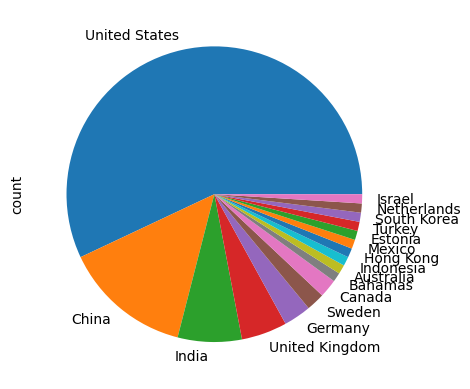

In [31]:
df["Country"].value_counts().plot.pie()

Стоимость 10 самых дорогих компаний

[Text(0, 0, 'Bytedance'),
 Text(1, 0, 'SpaceX'),
 Text(2, 0, 'Stripe'),
 Text(3, 0, 'Klarna'),
 Text(4, 0, 'Epic Games'),
 Text(5, 0, 'Canva'),
 Text(6, 0, 'Checkout.com'),
 Text(7, 0, 'Instacart'),
 Text(8, 0, 'Databricks'),
 Text(9, 0, 'Revolut'),
 Text(10, 0, 'FTX')]

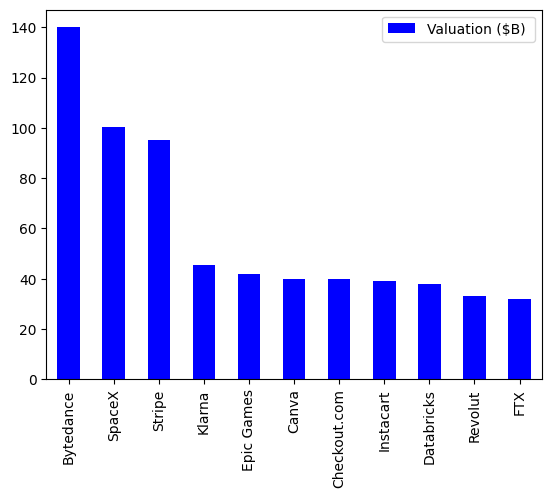

In [32]:
plot = df.loc[0:10][["Company", "Valuation ($B) "]].plot.bar(color=["blue"])
plot.set_xticklabels(df.loc[0:10]["Company"])

Гистограмма распределение количества компаний по году основания. Диаграмма показывает, что больше всего самых дорогих компаний было основано в период между 2012 и 2015 годом.

<Axes: xlabel='Founded Year'>

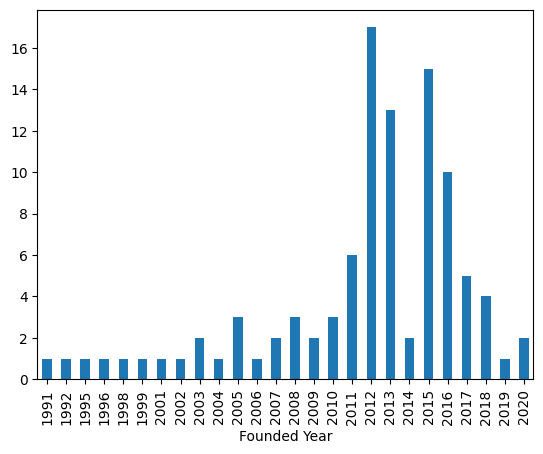

In [33]:
df["Founded Year"].value_counts().sort_index().plot.bar()

Точечная диаграмма показывает распределение стоимости компании от количества работников. Из диаграммы видно, что больше всего компаний, у которых в штате от 1000 до 5000 человек.

<Axes: xlabel='Number of Employees', ylabel='Valuation ($B) '>

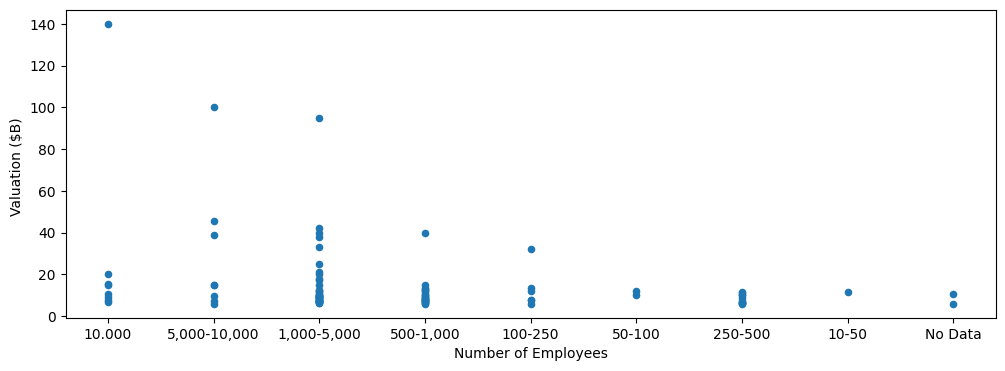

In [34]:
df.plot.scatter(x="Number of Employees", y="Valuation ($B) ", figsize=(12, 4))